# Final Project 
## Author: Tayaba Saleem 

In [93]:
#Libraries 
import os
import re
import tweepy as tw
import pandas as pd
import configparser
from textblob import TextBlob as TxB
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
import numpy as np
# import pycountry
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [94]:
#twitter connection
def connect_twitter():
        # Read the config file
        config = configparser.ConfigParser()
        config.read('C:/Users/tayab/Documents/IntrotoPython/LabsHomework/Final Project/config.ini')
        # Read the values
        api_key = config['twitter']['API_Key']

        api_key_secret = config['twitter']['API_Key_Secret']

        access_token = config['twitter']['Access_Token']

        access_token_secret = config['twitter']['Access_Token_Secret']

        auth = tw.OAuthHandler(api_key,api_key_secret)
        auth.set_access_token(access_token,access_token_secret)

        api= tw.API(auth)
        return api

In [98]:
#defining all my funtions 
#using regex to clean and formate my tweets 
def format_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

#analysis of twittee
def analysis_tweet(clean_string):
        process_data = TxB(clean_string)
        if process_data.sentiment.polarity > 0:
            return 'Positive'
        elif process_data.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'

#finding the tweet on key word or hash
def find_tweet(api,search_key, number_of_tweet):
        data=[]
        tweet_txt_joint=""
        public_tweet=tw.Cursor(api.search_tweets,q=str(search_key),lang="en",tweet_mode="extended").items(number_of_tweet)
        
        for tweet in public_tweet:
                tweet_txt = tweet.full_text
                tweet_time= tweet.created_at
                tweet_author=tweet.author.screen_name
                tweet_location=tweet.user.location
                tweet_location = format_tweet(tweet_location)
                process_date = (str(tweet_time)[:10])
                
                # clean the twittees
                clean_string= format_tweet(tweet_txt)
                #sentimate analysis of tweet
                sentimate_value = analysis_tweet(clean_string)
                tweet_txt_joint = tweet_txt_joint+(str(clean_string))

                data.append([tweet_txt,tweet_author,tweet_location,sentimate_value,process_date])
        df = pd.DataFrame(data)
        return df,tweet_txt_joint
    
#removing the stop words so the visuals and word could make sense 
def RemoveNormalWords(full_string):
        slected_list = ['The', 'the', 'a' ,'A', 
                        'IS' ,'is', 'and', 'to', 
                        'of','s','for','with',
                        'in','from','are','on','was',
                        'your','that','this','you','by',
                        'so','their','at','he','she',
                        's','I','it','t','by','be',
                        'as','an','has','have',
                        'our','will','de','they', 'his', 'but', 'did', 'take', 'try', 'not', 'about', 
                       'one','all', 'see', 'get', 'if', 'now', 'me', 'being', 'its', 'what', 'know', 
                       'can', 'hey', 'some', 'amp', 'we', 'or', 'my', 'out', 'up', 'DeFi', '1', 'do']
        statement = full_string
        database_1 = sorted(list(slected_list), key=len)
        pattern = re.compile(r"\b(" + "|".join(database_1) + ")\\W", re.I)
        return pattern.sub("", full_string + ' ')[:-1] 
    
#Measuring the % for pie charts 
def make_autopct(values):
                def my_autopct(pct):
                        total = sum(values)
                        val = int(round(pct*total/100.0))
                        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
                return my_autopct

#sentiment pie chart
def pie_chart(Positive_count,Neutral_count,Negative_count):
                count_sentimate = np.array([Positive_count,Neutral_count,Negative_count])
                plot_sentimate = ["Positive", "Neutral", "Negative"]
                colors = ['#1E8449', '#F1C40F', '#E74C3C']
                plt.pie(count_sentimate, labels = plot_sentimate,autopct=make_autopct(count_sentimate), colors = colors)
                plt.show() 
                
#counting the sentiments 
def Count_sentimates(datafm):
                z={}
                z= (datafm).value_counts(dropna=False)
                Positive_count= z.get('Positive')
                Negative_count= z.get('Negative')
                Neutral_count= z.get('Neutral')

                if(Positive_count== None):
                        Positive_count=0
                if(Negative_count == None):
                        Negative_count=0
                if(Neutral_count == None):
                        Neutral_count=0
                return Positive_count, Negative_count, Neutral_count
            
#word colud 
def word_cloud(datafm):
        comment_words = ''
        stopwords = set(STOPWORDS)
        for val in datafm:
                val = str(val)
                tokens = val.split()
                for i in range(len(tokens)):
                        tokens[i] = tokens[i].lower()
                        comment_words += " ".join(tokens)+" "
        word_cloud_var = WordCloud(width = 800, height = 800,
        background_color ='white',
        stopwords = stopwords,
        min_font_size = 10).generate(comment_words)
        return word_cloud_var

def word_cloud_str(split_tweet_txt):
        comment_words = ''
        stopwords = set(STOPWORDS)
        # Converts each token into lowercase
        for i in range(len(split_tweet_txt)):
                split_tweet_txt[i] = split_tweet_txt[i].lower()
                comment_words += " ".join(split_tweet_txt)+" "

        word_cloud_var = WordCloud(width = 800, height = 800,
        background_color ='white',
        stopwords = stopwords,
        min_font_size = 10).generate(comment_words)
        return word_cloud_var

def plot_word_cloud(word_cloud_var):
        # plot the WordCloud image                      
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(word_cloud_var)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.show()
        exit

In [95]:
#pulling 500 tweets for Jpmorgan or @jpmorgan
api = connect_twitter()
serach_string = "jpmorgan @jpmorgan"
number_of_tweet = 500
        
df,tweet_txt_joint = find_tweet(api,serach_string,number_of_tweet)             
df.rename(columns = {0:'tweet',1:'tweet_author',2:'tweet_location',3:'sentimate',4:'tweet_time'}, inplace = True)
print(df)
#print the tweet in a single string and is used for word cloud 
# print(tweet_txt_joint)

                                                 tweet    tweet_author  \
0    RT @RealPro4Real: A globally critical chip fir...    RealPro4Real   
1    A globally critical chip firm is driving a wed...    RealPro4Real   
2    @jpmorgan is now cancelling accounts of #chris...    RyonTheLion_   
3               @__chirag_ @jpmorgan Congrats brother.  VaibhavSharma_   
4    RT @JeanneMartin25: 🚨 @Barclays expect to brin...     NRDCNY_Rich   
..                                                 ...             ...   
495  Great to see @jpmorgan getting involved with D...       dburrells   
496  RT @ye4us: Yea but @harleypasternak did try to...  american_spoon   
497  RT @IntAdviser: The private banking arm of @jp...  Chris_Angeloni   
498  RT @CuttillEric: $APES were right the whole ti...       Gambiste1   
499  RT @QuantinuumQC: Using our H1-1 quantum compu...          HKA_PR   

       tweet_location sentimate  tweet_time  
0    Las Vegas Nevada  Negative  2022-12-06  
1    Las Vegas Neva

In [99]:
#number tweet that have a location
df['tweet_location'].value_counts()

                         190
London England            10
Washington DC              9
Global                     9
India                      6
                        ... 
the GM bus                 1
San Francisco              1
New Orleans Louisiana      1
Colorado USA               1
Mysore                     1
Name: tweet_location, Length: 189, dtype: int64

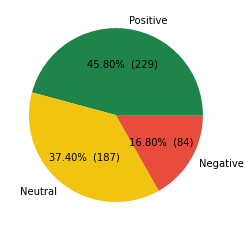

In [100]:
#sentimate value ploted into a pie chart 
Positive_count, Negative_count, Neutral_count = Count_sentimates(df['sentimate'])
pie_chart(Positive_count,Neutral_count,Negative_count)

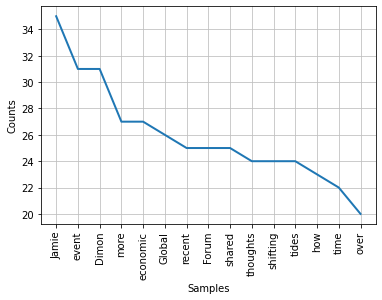

In [101]:
#visual to count the occurance of word
Nos= 15
full_string = tweet_txt_joint    
tweet_txt_joint=str(RemoveNormalWords(full_string))     
split_tweet_txt = tweet_txt_joint.split()      
txt_counters = Counter(split_tweet_txt)      
KeyWords = txt_counters.most_common(Nos)
fdist = FreqDist(txt_counters)
fdist.plot(Nos,cumulative=False)
plt.show()

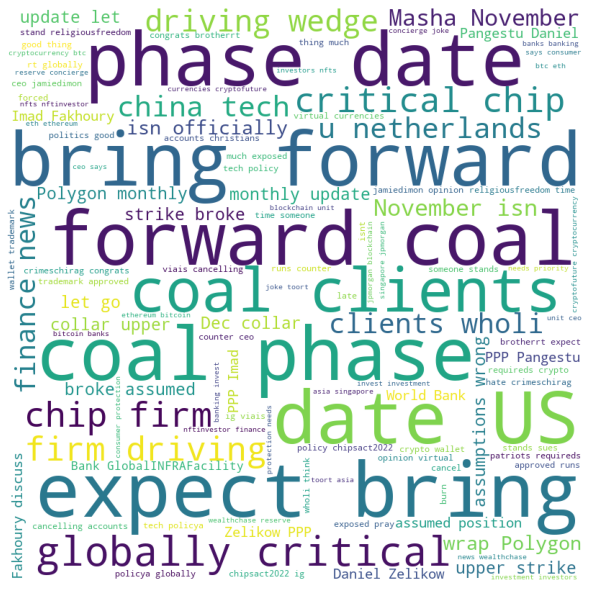

In [102]:
#analyzing the first 500 words and developing word cloud 
split_tweet_txt_new = split_tweet_txt[0:500]
word_cloud_var = word_cloud_str(split_tweet_txt_new)
plot_word_cloud(word_cloud_var)

In [108]:
#this is developing the dictionary where location is the key and data is the tweet and sentiments.
date_data = {}
for date_value in df['tweet_time']:
    if(str(date_value) != 0 or None):
        tweet_per_date=df.loc[df['tweet_time']== str(date_value),['tweet','sentimate']]
        date_data.update({date_value:tweet_per_date})
for Location in df['tweet_location']:
        tweet_per_loc=df.loc[df['tweet_location']== str(Location),['tweet','sentimate']]
        loc_data_dict.update({Location:tweet_per_loc})

location:
dict_keys(['Las Vegas Nevada', 'Florida', 'India', 'New York', 'Quincy IL', 'New York NY', 'Metaverse', 'WORLD WIDE', 'Dark Side Of The Moon', 'Florida USA', 'Republic of the Philippines', 'NYC', 'Northern Corsica Corsica', 'Houston TX', 'Washington DC', 'Chicago USA', 'Pacific Northwest', 'Los Angeles CA', 'Charlotte NC', 'Virginia USA', 'London England', '1 127 0 0 1', 'Tiburon CA USA', 'Mallorca', 'Austin Tx', 'Rochester NY and the U S', 'Australia', 'Oviedo Espa a', 'De Witt NY', 'E thebossnetwork09 com', 'Chicago In His Presence', 'info org', 'London', 'Primrose Hill London', 'Washington DC and NYC', 'Wewantfairmarkets org', 'Mount Everest', 'California USA', 'Palo Alto CA', 'Around the world', 'Dallas TX', 'Finland', 'USA', 'Ingolstadt Germany', 'Philadelphia PA', 'San Francisco CA', 'New Delhi', 'Queens NY', 'Kiyiv', 'Mysore', 'Now Elsewhere', 'North East United States', '70 countries and growing', 'London New York Asia', 'Mars', 'New York City', 'Kolkata India', 'Bloc

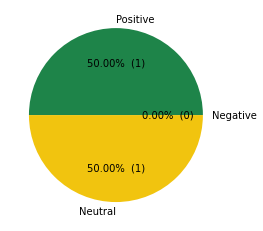

In [104]:
print('location:')
print(loc_data_dict.keys())
select_loc = input('Type in one of the location from the list:')
Tweets_loc = loc_data_dict.get(select_loc)
df_1 = pd.DataFrame(Tweets_loc)
print(Tweets_loc)
(Positive_count, Negative_count, Neutral_count) = Count_sentimates(df_1['sentimate'])
pie_chart(Positive_count, Neutral_count, Negative_count)

if len(Location) != 0 or None:
    tweet_per_loc = df.loc[df['tweet_location'] == str(Location), ['tweet', 'sentimate', 'tweet_time']]
loc_data_dict.update({
    Location: tweet_per_loc
})

In [ ]:
x= 1               
while(x == 1):
    print("location:")
    print(loc_data_dict.keys())
    select_loc = input('Type in one of the location from the list:')
    Tweets_loc = loc_data_dict.get(select_loc)
    df_1 = pd.DataFrame(Tweets_loc)
    print(Tweets_loc)
    Positive_count, Negative_count, Neutral_count = Count_sentimates(df_1['sentimate'])
    
    if(len(Location) != 0 or None):
        tweet_per_loc=df.loc[df['tweet_location']== str(Location),['tweet','sentimate','tweet_time']]
        loc_data_dict.update({Location:tweet_per_loc})

    x = int(input("If you like to continue type in 1 and it will search again for that paticular location: "))
    if(x!=1):
        print(50*"_#*#_")
        break

location:
dict_keys(['Las Vegas Nevada', 'Florida', 'India', 'New York', 'Quincy IL', 'New York NY', 'Metaverse', 'WORLD WIDE', 'Dark Side Of The Moon', 'Florida USA', 'Republic of the Philippines', 'NYC', 'Northern Corsica Corsica', 'Houston TX', 'Washington DC', 'Chicago USA', 'Pacific Northwest', 'Los Angeles CA', 'Charlotte NC', 'Virginia USA', 'London England', '1 127 0 0 1', 'Tiburon CA USA', 'Mallorca', 'Austin Tx', 'Rochester NY and the U S', 'Australia', 'Oviedo Espa a', 'De Witt NY', 'E thebossnetwork09 com', 'Chicago In His Presence', 'info org', 'London', 'Primrose Hill London', 'Washington DC and NYC', 'Wewantfairmarkets org', 'Mount Everest', 'California USA', 'Palo Alto CA', 'Around the world', 'Dallas TX', 'Finland', 'USA', 'Ingolstadt Germany', 'Philadelphia PA', 'San Francisco CA', 'New Delhi', 'Queens NY', 'Kiyiv', 'Mysore', 'Now Elsewhere', 'North East United States', '70 countries and growing', 'London New York Asia', 'Mars', 'New York City', 'Kolkata India', 'Bloc

Date:
dict_keys(['2022-12-06', '2022-12-05', '2022-12-04', '2022-12-03', '2022-12-02'])
Select the date from the list below, Parse Date in (YYYY-MM-DD) Format:2022-12-05
                                                 tweet sentimate
17   Cryptocurrencies can enable global financial i...   Neutral
18   RT @JeanneMartin25: 🚨 @Barclays expect to brin...  Positive
19   @jpmorgan is looking for someone to hold their...  Positive
20   RT @julie_wade: Are my assumptions wrong @jpmo...  Negative
21   Cancel Chase Bank @jpmorgan @Chase so you gonn...  Negative
..                                                 ...       ...
229  @ye4us Ari Emanuel + Ken Griffin robbing our p...   Neutral
230  @jsnyder01085019 @jpmorgan Almost anything els...  Negative
231  The only thing we have to fear is...Big Oil, W...  Negative
232  RT @FriendsOScience: Who knew that @jpmorgan w...   Neutral
233  @toptal @FortuneMagazine @jpmorgan You people ...  Positive

[217 rows x 2 columns]


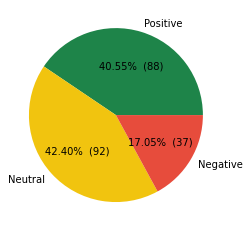

In [106]:
print("Date:")
print(date_data.keys())
select_date = input('Select the date from the list below, Parse Date in (YYYY-MM-DD) Format:')
Tweets_date= date_data.get(select_date)
print(Tweets_date)
df_1 = pd.DataFrame(Tweets_date)
Positive_count, Negative_count, Neutral_count = Count_sentimates(df_1['sentimate'])
pie_chart(Positive_count,Neutral_count,Negative_count)

[{'2022-12-06': [{'P': 5}, {'Ne': 5}, {'Nu': 7}]}, {'2022-12-05': [{'P': 88}, {'Ne': 37}, {'Nu': 92}]}, {'2022-12-04': [{'P': 41}, {'Ne': 21}, {'Nu': 20}]}, {'2022-12-03': [{'P': 44}, {'Ne': 10}, {'Nu': 36}]}, {'2022-12-02': [{'P': 51}, {'Ne': 11}, {'Nu': 32}]}]


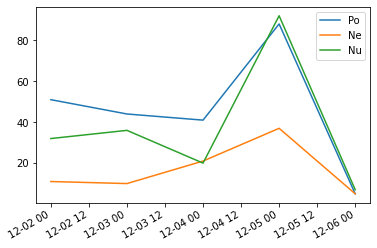

In [107]:
x_p= {}
x_ne={}
x_nu={}
x_date={}
date_list=[]
for dates in date_data.keys():
    Tweets_date= date_data.get(dates)
    df_1 = pd.DataFrame(Tweets_date)
    Positive_count, Negative_count, Neutral_count = Count_sentimates(df_1['sentimate']) 
    x_p={"P":Positive_count}
    x_ne={"Ne":Negative_count}
    x_nu={"Nu":Neutral_count}
    date_list.append({dates:[x_p, x_ne, x_nu]})
print(date_list)
date_time=[]
posetive_value=[]
negative_value=[]
neutral_value=[]
for dict_s in date_list:
    for k, v in dict_s.items():
        date_time.append(k)
        posetive_value.append(v[0].get('P'))
        negative_value.append(v[1].get('Ne'))
        neutral_value.append(v[2].get('Nu'))
date_time = pd.to_datetime(date_time)
DF = pd.DataFrame()
DF['Po'],DF['Ne'],DF['Nu'] = posetive_value,negative_value,neutral_value
DF = DF.set_index(date_time)
plt.plot(DF,label=['Po','Ne','Nu'])
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()